<a href="https://colab.research.google.com/github/GenAIUnplugged/Exploratory-Data-Analysis/blob/main/EDA_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("brendan45774/test-file")

print("Path to dataset files:", path)

100%|██████████| 11.2k/11.2k [00:00<00:00, 12.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/brendan45774/test-file/versions/6


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
print(os.listdir(path))

['tested.csv']


In [ ]:
# prompt: generate to read from the kaggle data

import pandas as pd
file_path = f"{path}/tested.csv"
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape

(418, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.nunique()

,0
PassengerId,418
Survived,2
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169


In [ ]:
len(df),df.shape[0]

(418, 418)

In [ ]:
(df.isnull().sum()/df.shape[0])*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


In [ ]:
df = df.drop(["Ticket","PassengerId"],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Name      418 non-null    object 
 3   Sex       418 non-null    object 
 4   Age       332 non-null    float64
 5   SibSp     418 non-null    int64  
 6   Parch     418 non-null    int64  
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [ ]:
df = df.drop(["Name"],axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,7.8292,NaN,Q
1,1,3,female,47.0,1,0,7.0000,NaN,S
2,0,2,male,62.0,0,0,9.6875,NaN,Q
3,0,3,male,27.0,0,0,8.6625,NaN,S
4,1,3,female,22.0,1,1,12.2875,NaN,S


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Cabin,327
Embarked,0


In [ ]:
df.Sex = df.Sex.apply(lambda x:x.upper())

In [ ]:
df.Cabin.mode()[0]

'C'

In [ ]:
df.Cabin = df.Cabin.str[0]

In [ ]:
df.Cabin = df.Cabin.fillna(df.Cabin.mode()[0])

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,MALE,34.5,0,0,7.8292,C,Q
1,1,3,FEMALE,47.0,1,0,7.0000,C,S
2,0,2,MALE,62.0,0,0,9.6875,C,Q
3,0,3,MALE,27.0,0,0,8.6625,C,S
4,1,3,FEMALE,22.0,1,1,12.2875,C,S
...,...,...,...,...,...,...,...,...,...
413,0,3,MALE,NaN,0,0,8.0500,C,S
414,1,1,FEMALE,39.0,0,0,108.9000,C,C
415,0,3,MALE,38.5,0,0,7.2500,C,S
416,0,3,MALE,NaN,0,0,8.0500,C,S


In [ ]:
df.Cabin.value_counts()

,count
Cabin,
C,362
B,18
D,13
E,9
F,8
A,7
G,1


In [ ]:
df.Cabin.unique()

array(['C', 'B', 'E', 'A', 'D', 'F', 'G'], dtype=object)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,418.0,NaN,NaN,NaN,0.363636,0.481622,0.0,0.0,0.0,1.0,1.0
Pclass,418.0,NaN,NaN,NaN,2.26555,0.841838,1.0,1.0,3.0,3.0,3.0
Sex,418,2,MALE,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
SibSp,418.0,NaN,NaN,NaN,0.447368,0.89676,0.0,0.0,0.0,1.0,8.0
Parch,418.0,NaN,NaN,NaN,0.392344,0.981429,0.0,0.0,0.0,0.0,9.0
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,418,3,S,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(exclude='int64').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,418,2,MALE,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,332.0,NaN,NaN,NaN,30.27259,14.181209,0.17,21.0,27.0,39.0,76.0
Fare,417.0,NaN,NaN,NaN,35.627188,55.907576,0.0,7.8958,14.4542,31.5,512.3292
Cabin,91,76,B57 B59 B63 B66,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,418,3,S,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.0,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.0,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.0,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.0,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.0,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.5,512.3292


<Axes: xlabel='Age', ylabel='Count'>

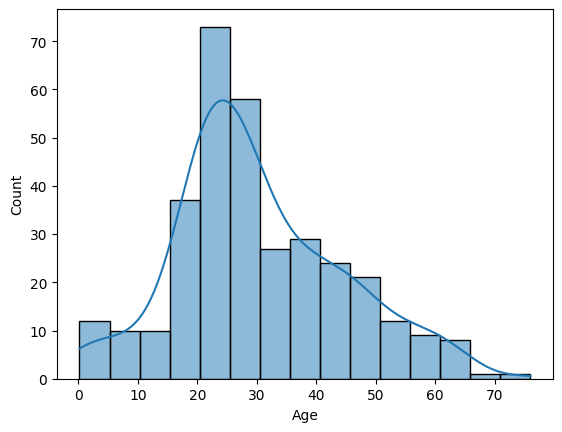

In [ ]:
sns.histplot(df.Age.dropna(),kde=True)

In [ ]:
df.Age.skew()

np.float64(0.4573612871503845)

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.to_list()
num_cols = df.select_dtypes(include=np.number).columns.to_list()
cat_cols,num_cols

(['Sex', 'Cabin', 'Embarked'],
 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [ ]:
import math
n_cols_plot = 3
num_rows_plot = math.ceil(len(num_cols)//n_cols_plot)
num_rows_plot,n_cols_plot

(2, 3)

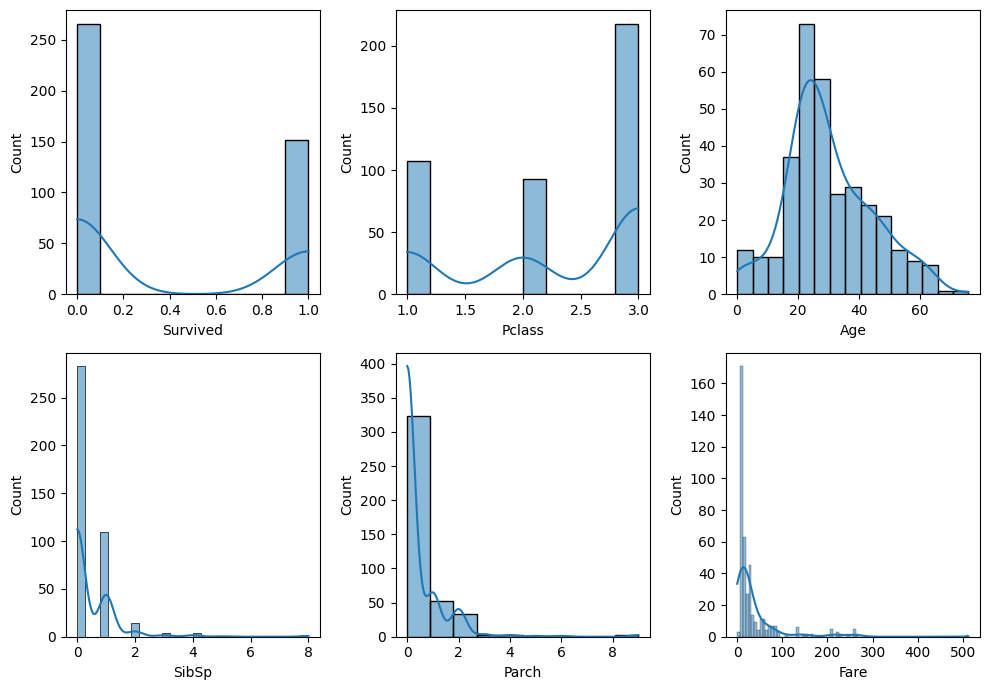

In [ ]:
plt.figure(figsize=(10,7))
for i,col in enumerate(num_cols):
  plt.subplot(num_rows_plot,n_cols_plot,i+1)
  sns.histplot(df[col].dropna(),kde=True)
plt.tight_layout()
plt.show()

In [ ]:
num_cat_cols = 3
num_row_cols = math.ceil(len(cat_cols)//num_cat_cols)
num_row_cols,num_cat_cols

(1, 3)

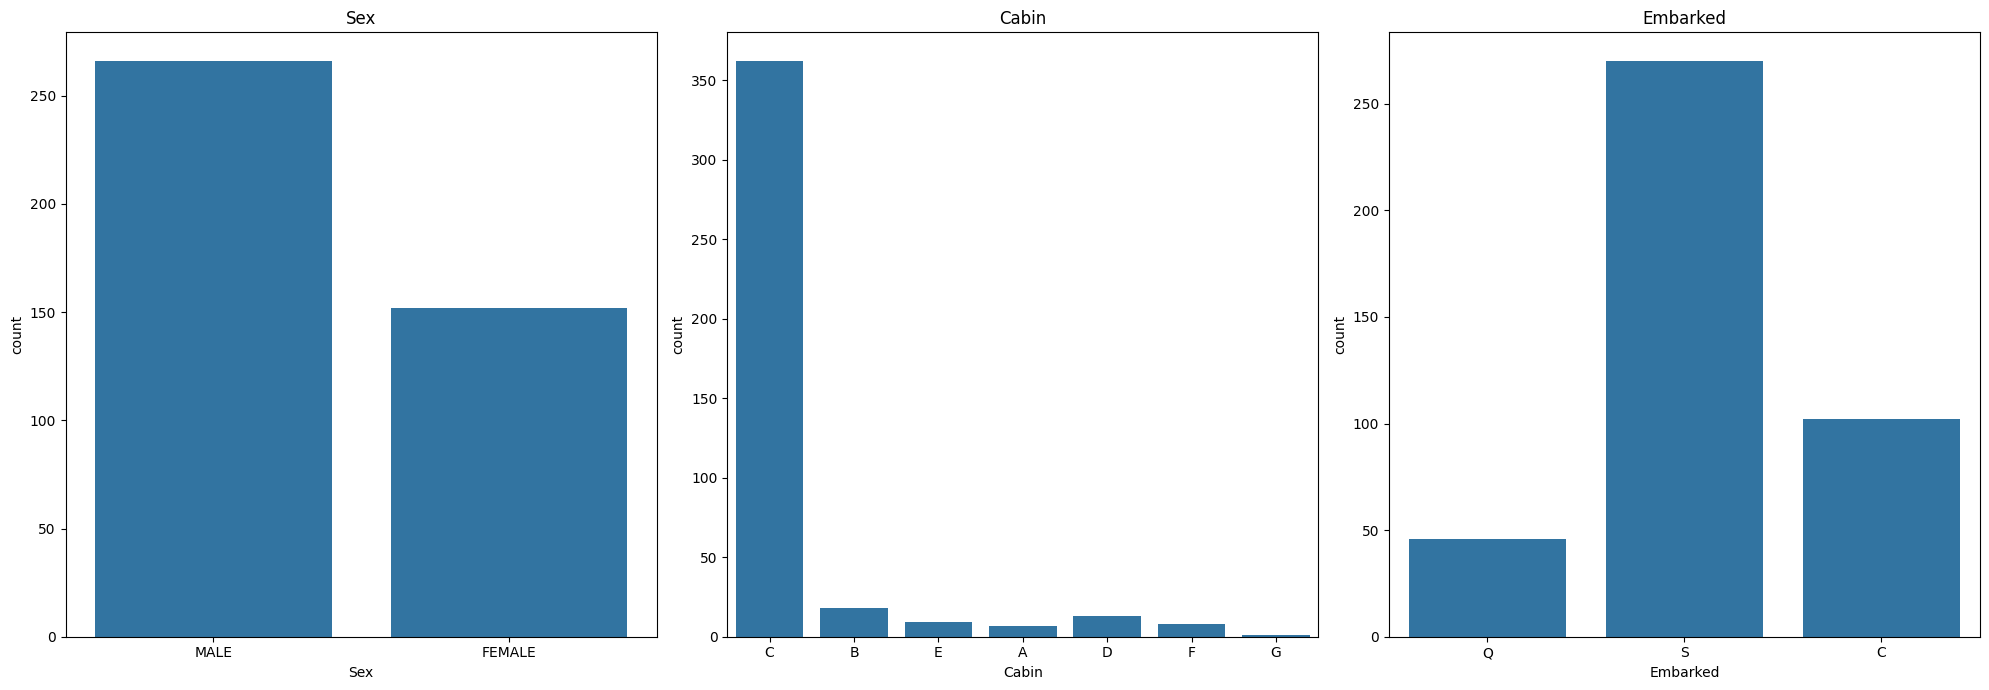

In [ ]:
plt.figure(figsize=(20, 7))
for i, col in enumerate(cat_cols):
    plt.subplot(num_row_cols, num_cat_cols, i + 1)
    sns.countplot(x=df[col].dropna(), orient='h')  # Changed y= to x= and orient to 'h'
    plt.title(col)  # Optional: adds a title to each subplot
plt.tight_layout()
plt.show()
